<div style="text-align: center">

<h1 style="font-size: 250%;">Investigate A Dataset</h1>
<h2>Abdulrahman Mohammed Alobaidy</h2>
<h3>Cohort 9</h3>
<h3>Data Analyst Nanodegree Program</h3>
<h4>Email: <a href="mailto:AbdulrahmanAlobaidy2001@gmail.com">AbdulrahmanAlobaidy2001@gmail.com</a></h4>

</div>

# Introduction
***
For this project I chose the "No-show-appointments" dataset available on [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments), this is a dataset that contains information regarding patients and their attendence status, whether they showed up for the appointment or did not.

# Questions
***
Here are some questions that we intend to answer after taking a look at the dataset and analyzing it.

1. What are the key factors that indicate whether a patient is going to show up for the appointment or not.
2. What is there in common amongst people who show and people who don't.
3. What are some relationships between the different variables that can be discovered during the exploration of this dataset.


# About The Dataset
***
The dataset contains the records for over 100,000 appointments, each row has 14 characteristics or variables which are listed below along with their respective meaning.


<div style="font-size: 17px; line-height: 200%;padding-left: 20px;">

<ol>    

<li> <b>PatientId</b> : Identification of a patient</li>

<li> <b>AppointmentID</b> : Identification of each appointment</li>

<li> <b>Gender</b> : Male or Female</li>

<li> <b>ScheduledDay</b> : The date when the appointment was set</li>

<li> <b>AppointmentDay</b> : The date when the appointment took place</li>

<li> <b>Age</b> : The patient's Age</li>

<li> <b>Neighbourhood</b> : Where the appointment took place</li>

<li> <b>Scholarship</b> : True or False, whether the patient is enrolled in the Brasilian welfare program <a href="https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia">Bolsa Família</a></li>

<li> <b>Hipertension</b> : True or False</li>

<li> <b>Diabetes</b> : True or False</li>

<li> <b>Alcoholism</b> : True or False</li>

<li> <b>Handcap</b> : True or False</li>

<li> <b>SMS_received</b> : True or False</li>

<li> <b>No-show</b> : Yes or No, Yes if the person missed the appointment, No if the person did show</li>


</ol>    

</div>

# Overview of the Dataset
***
First of all, let's take a look at what the dataset looks like and if there are a few abnormalities that we can detect.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The first things I notice are the columns named `Hipertension` and `Handcap`, the word 'Hipertension' is Spanish for 'Hypertension', while the second one is just the word 'Handicap' misspelled.

The second thing I see is that the values of the 'No-show' column are rather confusing, so we will need to take a look at that too.

Now, let's take a look at the data types of the variables, along with their non-null values.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We notice that both, the `ScheduledDay` and the `AppointmentDay` columns are of data type `string`, so we need to change these to datetime objects.

Now we are going to take a look at the unique values of each variable.

In [3]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

We have:

* `62299` unique patients
* `110527` appointments
* `81` neighbourhoods
* The `Handcap` field seems problematic, it is supposed to be boolean, but instead it has five values   


In [4]:
df['ScheduledDay'].min(), df['ScheduledDay'].max()

('2015-11-10T07:13:56Z', '2016-06-08T20:07:23Z')

In [5]:
df['AppointmentDay'].min(), df['AppointmentDay'].max()

('2016-04-29T00:00:00Z', '2016-06-08T00:00:00Z')

The `ScheduledDay` variable starts on '2015-11-10' and ends on '2016-06-08', while `AppointmentDay` starts on '2016-04-29' and ends on '2016-06-08'.

Now, let's apply the `describe` method to the DataFrame

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We notice that the `Age` variable has a minimum of `-1`, now we have to take this into account when cleaning the dataset.

# Cleaning the Dataset
Now we have to take care of the problems that we found earlier, which are the following:
* Renaming The columns `Hipertension` and `Handcap` to more appropriate names.
* Reformating the `No-show` column.
* Changing data types of `ScheduledDay` and `AppointmentDay` to `datetime` objects.
* getting rid of the erroneous rows that contain invalid values for the `Handcap` variable.
* Looking into the `-1` value in the `Age` variable.

### Here, we change the column names to more appropriate ones.

In [7]:
df.rename(columns = {'No-show' : 'did_show', 'Hipertension' : 'Hypertension', 'Handcap' : 'Handicap'}, inplace=True)

### Changing the `did_show` values to appropriate format

In [8]:
def show_to_int(string):
    if string == 'No':
        return 1
    return 0

df['did_show'] = df['did_show'].apply(show_to_int)

Now, if the `did_show` value is `1`, this means that the person showed up for the appointment, otherwise, he/she didn't.

### Coverting the `ScheduledDay` and `AppointmentDay` data types to datetime objects

In [9]:
from datetime import datetime as dt

def convert_to_datetime(string):
    return dt.strptime(string, '%Y-%m-%dT%H:%M:%SZ')

def convert_series_to_datetime(series):
    return series.apply(convert_to_datetime)


df[['ScheduledDay', 'AppointmentDay']] = df[['ScheduledDay', 'AppointmentDay']].apply(convert_series_to_datetime)

### Removing erroneous `Handicap` values

In [10]:
df['Handicap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

Here we can see that there are a few rows that are non-binary

In [11]:
invalid_handicap_rows = df[df['Handicap'] > 1]

df.drop(invalid_handicap_rows.index, inplace=True)

### Investigate erroneous `Age` value

In [12]:
age_err = df[df['Age'] == -1]

age_err

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,did_show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,1


Try to find another row for the same `PatientId` to maybe fix this error if the other row has a correct value

In [13]:
df.merge(age_err, on='PatientId', how='inner')

,PatientId,AppointmentID_x,Gender_x,ScheduledDay_x,AppointmentDay_x,Age_x,Neighbourhood_x,Scholarship_x,Hypertension_x,Diabetes_x,...,AppointmentDay_y,Age_y,Neighbourhood_y,Scholarship_y,Hypertension_y,Diabetes_y,Alcoholism_y,Handicap_y,SMS_received_y,did_show_y
0,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,...,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,1


Unfortunately, there is only this row, so it is best to remove it

In [14]:
df.drop(age_err.index, inplace=True)

# Modifying the Dataset
Now I'm going to derive some features from the dataset, such as the days between the `ScheduledDay` and `AppointmentDay`, as well as the day of the week that the appointment is scheduled to take place, and whether it is a holiday or not and finally classfying ages into age ranges such as '20-30' and '30-40'.

# Days Between

In [15]:
df['DaysBetween'] = df['AppointmentDay'] - df['ScheduledDay']

Now if we take a look at the new column, `DaysBetween`

In [16]:
df['DaysBetween'].head()

0   -1 days +05:21:52
1   -1 days +07:51:33
2   -1 days +07:40:56
3   -1 days +06:30:29
4   -1 days +07:52:37
Name: DaysBetween, dtype: timedelta64[ns]

We see that there are negative values, that is because the time between the two dates is less than one day, also, I'm interested in only the days not the date nor time, let's fix this

In [17]:

def fixDaysBetween(d):
    # take the day from the datetime object
    d = d.days
    # if less than one day, consider it zero days
    if d <= 0:
        return 0
    # else, return number of days between
    else:
        return d

df['DaysBetween'] = df['DaysBetween'].apply(fixDaysBetween)

In [18]:
df['DaysBetween'].head()

0    0
1    0
2    0
3    0
4    0
Name: DaysBetween, dtype: int64

Now it's fixed

# Day of Week

In [19]:
def get_day_of_week(d):
    return d.weekday()

df['DayOfWeek'] = df['AppointmentDay'].apply(get_day_of_week)

The days start from Monday being 0, all the way to Sunday being 6.

# Is Weekday

In [20]:
def isWeekDay(day):
    if day >= 0 and day <= 4:
        return 1
    return 0

df['IsWeekDay'] = df['DayOfWeek'].apply(isWeekDay)

df['IsWeekDay'].value_counts()

1    110288
0        39
Name: IsWeekDay, dtype: int64

# Age Ranges
We will attempt to classify the ages of the patients into catergories based on their age.

In [21]:
# the size of the age class
steps = 10
# creating a numpy array with the desired ranges and appending the 200 at the end in order to include the remaining of the ages
age_ranges = np.append(np.arange(0, 100, steps), 200)
# create a list to store the corresponding labels of the age classes
age_ranges_labels = list()
# loop over the age ranges
for i in range(age_ranges.shape[0]):
    # append the current number with the next number with a hyphen separating them, then append it to the labels list
    age_ranges_labels.append(str(age_ranges[i]) + '-' + str(age_ranges[i + 1]))
    # if the only range that is left is the x+ range, then append that to the labels list and break
    if i == age_ranges.shape[0] - 3:
        age_ranges_labels.append(str(age_ranges[i + 1]) + '+')
        break
age_ranges, age_ranges_labels

(array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 200]),
 ['0-10',
  '10-20',
  '20-30',
  '30-40',
  '40-50',
  '50-60',
  '60-70',
  '70-80',
  '80-90',
  '90+'])

Now that we have generated the age ranges and their corresponding labels, let's classify the ages into their correct bins, know that this notation `0-10` corresponds to this range `[0, 10)`

In [22]:
df['AgeRange'] = pd.cut(df['Age'], age_ranges, labels=age_ranges_labels)

In [23]:
df['AgeRange'].head()

0    60-70
1    50-60
2    60-70
3     0-10
4    50-60
Name: AgeRange, dtype: category
Categories (10, object): ['0-10' < '10-20' < '20-30' < '30-40' ... '60-70' < '70-80' < '80-90' < '90+']

Now save the final dataset to a CSV file and name it `clean`

In [24]:
df.to_csv('clean.csv', index=False)

# EDA
***
Finally, we get into the EDA or the Exploratory Data Analysis stage in which we view the data to uncover trends and gain insights about the variables and their relationships with one another and hopefully find answers to our questions that we posed earlier and perhaps ask new questions that we didn't think of before seeing the data.

First of all, let's start by reading the cleaned CSV file and setting the `AppointmentID` column as the index.

In [25]:
df = pd.read_csv('clean.csv', index_col='AppointmentID')

I will start to by creating histograms of all the numeric variables that we have in our dataset.

In [26]:
#df.hist(figsize=(12, 12), grid=False);

<center>
Histograms of Numerical Data
<img src="https://raw.githubusercontent.com/AbdulrahmanAlobaidy/DAND-project-2/master/histograms.png" width="65%" height="65%">
</center>

From the group of histograms we notice a few things, which are the following:

<div style="font-size: 17px; line-height: 200%;padding-left: 20px;">

<ul>    

<li>The age distribution is somewhat right skewed, with the majority of patients being of age 0-10, then 50-60</li>

<li>The majority of the people don't have a welfare scholarship</li>
    
<li>The majority of the people don't have hypertension, diabetes, alcoholism nor handicap</li>
    
<li>Slightly less than half of the patients have received an SMS message</li>
    
<li>The majority of people did show up for their appointments</li>
    
<li>A high percentage of the patients had a zero-day waiting peroid between booking the appointment and the appointment's date</li>

<li>The day of the week with the most appointments is Wednesday, followed by Tuesday by a slight difference, with a very small number of appointments made for Saturday and no appointments made for Sunday at all, this makes sense since these are weekends.</li>

<li>As we can see in the last histogram that almost all of the appointments are made during weekdays not weekend.</li>
    

</ul>    

</div>

Now, I want to create a pair plot between the variables and see if we can find any relationships between any of them.

In [27]:
#sns.pairplot(df, vars=['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'IsWeekDay',
#                      'DayOfWeek', 'DaysBetween', 'did_show'], kind='scatter', diag_kind='kde');

<center>
Pairplot Between The Variables
<img src="https://raw.githubusercontent.com/AbdulrahmanAlobaidy/DAND-project-2/master/pairplot.png" width="65%" height="65%">
</center>

Here, all of the variables are categorical except the `Age`, so scatter plots between them won't tell us much, but the `Age` variable, which is quantitative, can be used to see the distribution of ages among the different categories, but overall, nothing helpful was derived from this visual alone.

Now, I'm going to introduce a function that we will use throughout this documentation that will allow us to get the proportions of given data in a series.

In [28]:
def get_props(series):

    # get total number of rows
    count = series.count()

    # get the number of 1s in the series
    total1 = series.sum()

    # calculate the proportion of the 1s in the series
    prop1 = total1 / count
    # calculate the proportion of the 0s in the series
    prop2 = 1 - prop1

    # return a tuple
    return prop1, prop2

Some of the variables that you will see throughout this documentation will be starting with `gb_` this stands for 'Group By', then followed by the variable(s) that the data is group by, for example `gb_x` corresponds to `df.groupby('x')` and `gb_x_y` corrseponds to `df.groupby(['x', 'y'])`

Now, I'll start analyzing and visualizing the data that we have and try to uncover relationships between them.

First I will get the of proportions of patients that attended and those who didn't.

(0.7980730011692514, 0.2019269988307486)

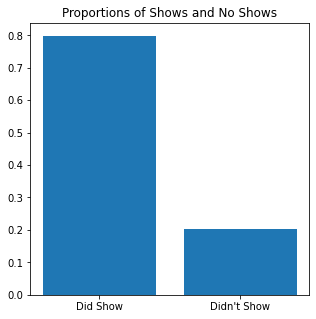

In [29]:
plt.subplots(figsize=(5,5))
plt.bar([1,2], get_props(df['did_show']), tick_label=["Did Show", "Didn't Show"])

plt.title('Proportions of Shows and No Shows');

get_props(df['did_show'])

About 80% of the appointments that were made, the patients attended, while about 20% didn't show up.

Now, I'm going to get the proportions of appointments made by gender

Gender
F    71730
M    38597
Name: PatientId, dtype: int64

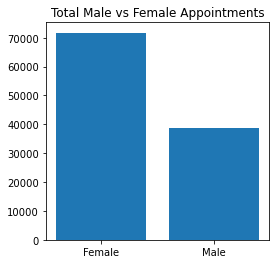

In [30]:
gb_gender = df.groupby('Gender')

gender_count = gb_gender.count()['PatientId']

plt.subplots(figsize=(4,4))

plt.bar([1,2], gender_count, tick_label=['Female', 'Male'])

plt.title('Total Male vs Female Appointments');

gender_count

Now let's find out how many of the patients are either male or female.

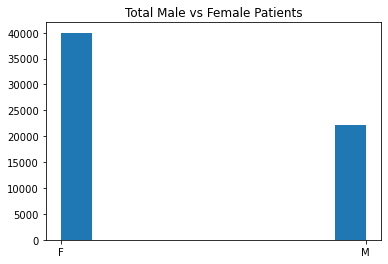

In [31]:
gb_patientId = df.groupby('PatientId')

# take only the gender from the first row of each group, since we don't want to count the extra appointment rows of the group
gb_patientId.first()['Gender'].hist(grid=False)

plt.title('Total Male vs Female Patients');

The female appointments in total where almost double the male appointments.

Now, let's compare the total shows and no shows for both genders

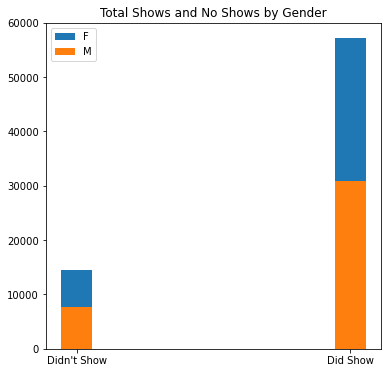

In [32]:
gb_gender['did_show'].hist(figsize=(6,6), legend=True, grid=False);

plt.xticks([0.05,0.95], ["Didn't Show", "Did Show"])
plt.title('Total Shows and No Shows by Gender');

Now, let's get the proportions of shows and no shows by gender rather than the total.

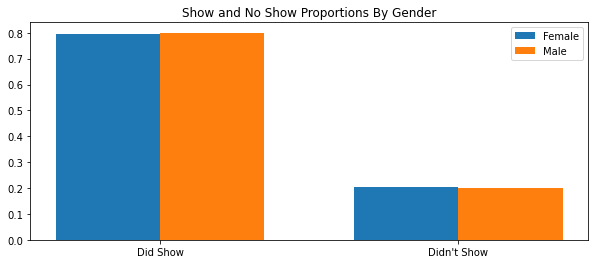

In [33]:
total_gender_show_prop, total_gender_no_show_prop = get_props(gb_gender['did_show'])


locations = np.arange(len(total_gender_show_prop))

female_show_props = [total_gender_show_prop['F'], total_gender_no_show_prop['F']]

male_show_props = [total_gender_show_prop['M'], total_gender_no_show_prop['M']]

width = 0.35

plt.subplots(figsize=(10, 4))

plt.bar(locations, female_show_props, width=width, label='Female')
plt.bar(locations + width, male_show_props, width=width, label='Male')

plt.title('Show and No Show Proportions By Gender')

plt.xticks(locations + width / 2, ["Did Show", "Didn't Show"])
plt.legend();

Now, showing the ages for patients that showed vs. those who didn't.

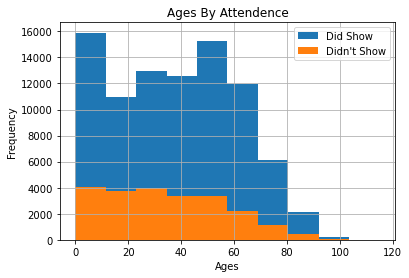

In [34]:
df.query('did_show == 1')['Age'].hist(label="Did Show")
df.query('did_show == 0')['Age'].hist(label="Didn't Show")

plt.title('Ages By Attendence')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.legend();

The distributions are a little bit close in shape, but differ a lot in frequency.

Now displaying the mean ages for showing and not showing.

did_show
0    34.279109
1    37.777090
Name: Age, dtype: float64

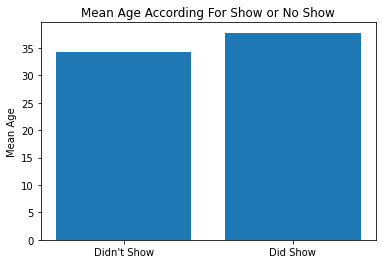

In [35]:
gb_show = df.groupby('did_show')

plt.bar([1,2], gb_show['Age'].mean(), tick_label=["Didn't Show", "Did Show"]);

plt.title('Mean Age According For Show or No Show')

plt.ylabel('Mean Age')


gb_show['Age'].mean()

Displaying the total of shows and no shows for each day of the week in order to determine if a certain one is more likely to have more missed appointments than the others.

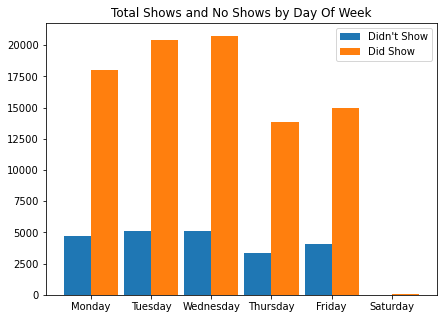

In [36]:
gb_show_dow = df.groupby(['did_show', 'DayOfWeek'])


locations = np.arange(6)

width = 0.45

plt.subplots(figsize=(7, 5))

plt.bar(locations, gb_show_dow.count()['PatientId'].iloc[:6], width=width, label="Didn't Show")
plt.bar(locations + width, gb_show_dow.count()['PatientId'].iloc[6:], width=width, label="Did Show")

plt.title('Total Shows and No Shows by Day Of Week')

plt.xticks(locations + width / 2, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.legend();

Now, the proportions of shows and no shows per day of week.

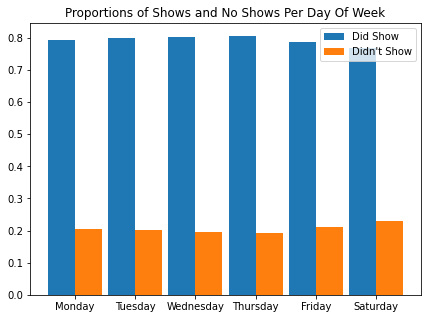

In [37]:
gb_dow = df.groupby('DayOfWeek')


locations = np.arange(6)

width = 0.45

plt.subplots(figsize=(7, 5))

plt.bar(locations, get_props(gb_dow['did_show'])[0], width=width, label="Did Show")
plt.bar(locations + width, get_props(gb_dow['did_show'])[1], width=width, label="Didn't Show")

plt.title('Proportions of Shows and No Shows Per Day Of Week')

plt.xticks(locations + width / 2, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.legend();

All of the days have similar attendence rate, as well as no show rate.

Now, we will take a look at the mean of days between the `ScheduledDay` and `AppointmentDay` to perhaps find a correlation between the `DaysBetween` and the status of attendence.

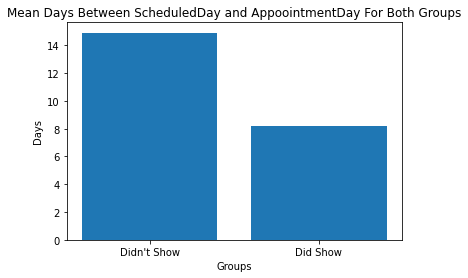

In [38]:
locations = np.arange(2)

plt.bar(locations, gb_show['DaysBetween'].mean(), tick_label=["Didn't Show", "Did Show"])

plt.xticks(locations,  ["Didn't Show", "Did Show"])

plt.title('Mean Days Between ScheduledDay and AppoointmentDay For Both Groups')
plt.ylabel('Days')
plt.xlabel('Groups');

It seems that the patients who missed the appointment had a longer waiting period than those who didn't.

Now, let's plot each neighbourhood's total shows to maybe identify neighbourhoods that are better than others.

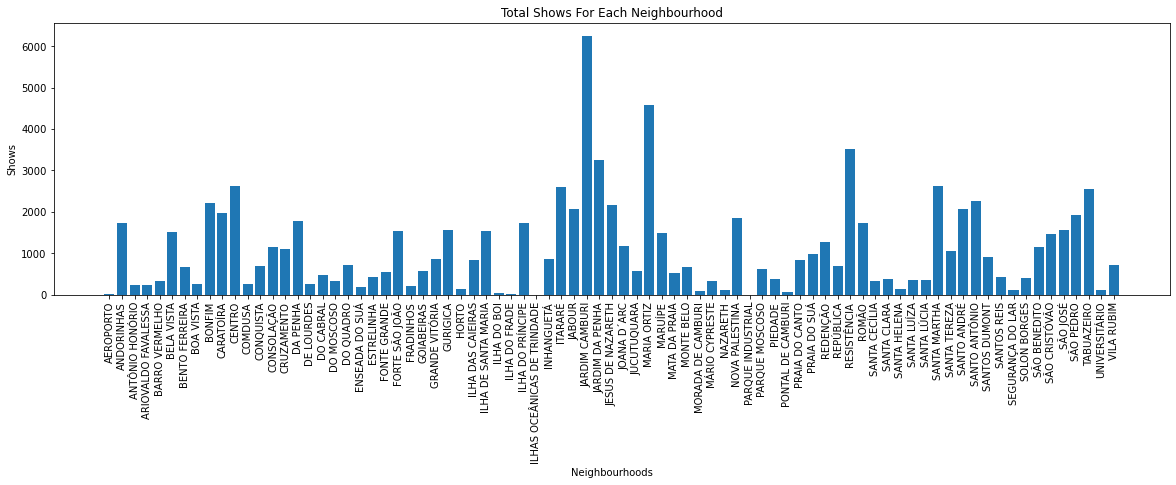

In [39]:
gb_neighbourhood = df.groupby('Neighbourhood')

locations = np.arange(df['Neighbourhood'].nunique())

width = 0.25

plt.subplots(figsize=(20, 5))

plt.bar(locations, gb_neighbourhood['did_show'].sum())

plt.title('Total Shows For Each Neighbourhood')
plt.xlabel('Neighbourhoods')
plt.ylabel('Shows')
plt.xticks(locations, gb_neighbourhood['did_show'].sum().index, rotation=90);


Now, the proportions for each neighbourhood for shows and no shows.

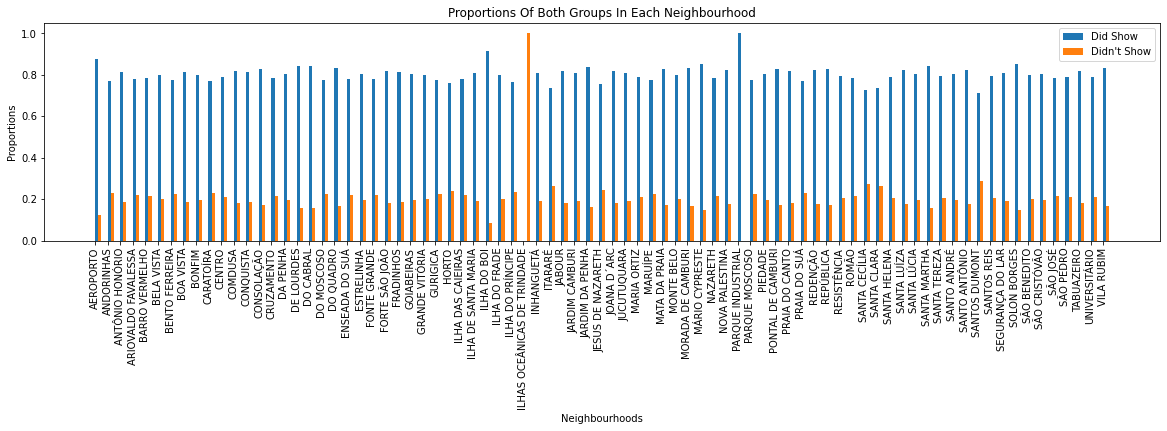

In [40]:
neighbourhood_props = get_props(gb_neighbourhood['did_show'])


locations = np.arange(len(neighbourhood_props[0]))

width = 0.25

plt.subplots(figsize=(20, 4))

plt.bar(locations + width, neighbourhood_props[0], width=width, label='Did Show')
plt.bar(locations + width * 2, neighbourhood_props[1], width=width, label="Didn't Show")

plt.title('Proportions Of Both Groups In Each Neighbourhood')
plt.xlabel('Neighbourhoods')
plt.ylabel('Proportions')
plt.xticks(locations + width / 2, neighbourhood_props[0].index, rotation=90)

plt.legend();

In [41]:
neighbourhood_props[0].median()

0.8032786885245902

The median attendence for the 81 neighbourhoods is 80%.

Now, let's classify patients by what proportion does a patient attends his/her appointments i.e. if a patient has 5 appointments and they showed up for all 5 appointments, they have an attendence rate of 100% and so on, this can be used to predict if a patient is likely to show up or not based on past experiences with that patient.

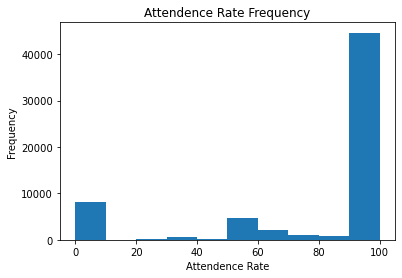

In [42]:
(get_props(gb_patientId['did_show'])[0] * 100).hist(grid=False)

plt.title('Attendence Rate Frequency')
plt.xlabel('Attendence Rate')
plt.ylabel('Frequency');

The majority of the patients have an attendance rate of 100%, this can't be trusted since some of the patients have only one appointment registered, but it is a very good place to start.

Now, we will display a bar plot for each age group and their attendence frequency.

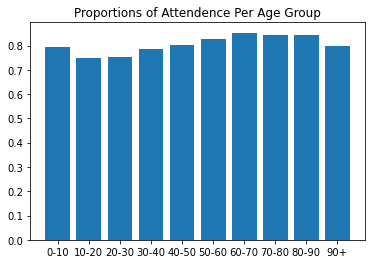

In [43]:
gb_age = df.groupby('AgeRange')

ages_props = get_props(gb_age['did_show'])[0]

locations = np.arange(len(ages_props))

plt.bar(locations, ages_props, tick_label=age_ranges_labels)

plt.title('Proportions of Attendence Per Age Group');

Based on this plot we notice that the groups with the lowest attendence are the `10-20` and `20-30` age groups.

Now let's take a look at the relationships between the various conditions that patients have and their relationship with the attendence status.

The following plots that you will see are the conditions compared to the attendence status, they will show what proportion of the patients that have or don't have the condition have showed up for the appointment.

First, we have the `Scholarship` variable.

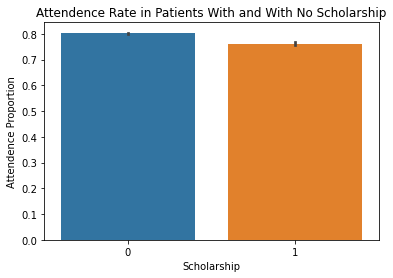

In [44]:
sns.barplot(x = 'Scholarship', y = 'did_show', data=df)
plt.ylabel('Attendence Proportion')

plt.title('Attendence Rate in Patients With and With No Scholarship');

First, we have the `Hypertension` variable.

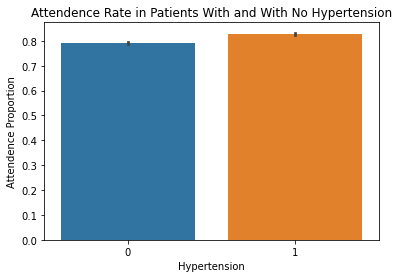

In [45]:
sns.barplot(x = 'Hypertension', y = 'did_show', data=df)
plt.ylabel('Attendence Proportion')

plt.title('Attendence Rate in Patients With and With No Hypertension');

First, we have the `Diabetes` variable.

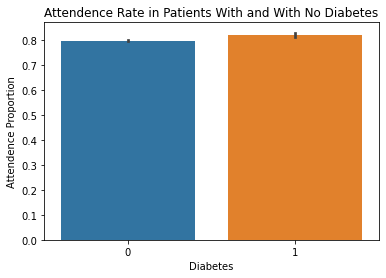

In [46]:
sns.barplot(x = 'Diabetes', y = 'did_show', data=df)
plt.ylabel('Attendence Proportion')

plt.title('Attendence Rate in Patients With and With No Diabetes');

First, we have the `Alcoholism` variable.

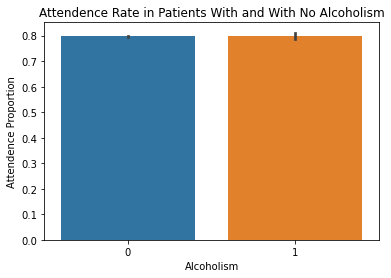

In [47]:
sns.barplot(x = 'Alcoholism', y = 'did_show', data=df)
plt.ylabel('Attendence Proportion')

plt.title('Attendence Rate in Patients With and With No Alcoholism');

First, we have the `Handicap` variable.

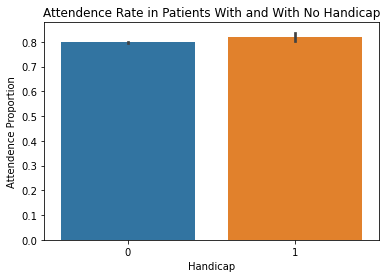

In [48]:
sns.barplot(x = 'Handicap', y = 'did_show', data=df)
plt.ylabel('Attendence Proportion')

plt.title('Attendence Rate in Patients With and With No Handicap');

First, we have the `SMS_received` variable.

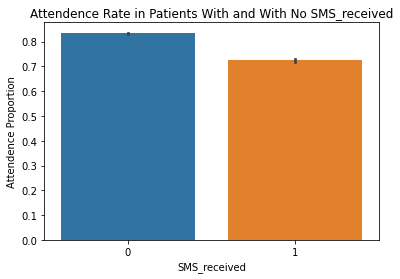

In [49]:
sns.barplot(x = 'SMS_received', y = 'did_show', data=df)
plt.ylabel('Attendence Proportion')

plt.title('Attendence Rate in Patients With and With No SMS_received');

# Findings
***
Although we can't accurately predict what variables are more important than others and by how much are they important than the others, we did find a few characteristics that seemed to distinguish people who showed up for the appointment from those who didn't.

<div style="font-size: 17px; line-height: 200%;padding-left: 20px;">

<ul> 

<li>There is naturally a high possibilty that the patient will show up for the appointment, since there is an 80% chance that they will.</li>

<li>We did notice that women had a lower attendence rate than men and higher missing than men, but by a small margin in both ways.</li>

<li>We can infer that patients with a higher age are more likely to attend their appointments.</li>

<li>The no show appointments tend to have a longer period between the `ScheduledDay` and `AppointmentDay` dates.</li>

<li>The attendence rate for almost all the neighbourhoods are the same, we can't count on the `Neighbourhood` variable.</li>

<li>We can somewhat depend on the past attendence rate of each patient to determine his/her attendence, given sufficient data.</li>

<li>When we separated the patients into groups according to age, we found that patients in age groups from 10 to 30 have the lowest attendence rate than any other age groups.</li>

<li>Patients with no Scholarship, Hypertension, Diabetes and Handicap are less likely to show up than those who have these conditions, but by a small margin.</li>    

<li>Alcoholism has almost no effect on the attendence status.</li>
    
<li>Surprisingly, patients who do receive an SMS are less likely to show up than those who don't.</li>

</ul>
    
</div>

# Final Thoughts
***
Finally, I'd like to state that these analyses are not solid as they are based solely on observation, as this is a limitation of descriptive analysis, we would need to apply some sort of machine learning and statistical analysis in order to predict the outcome based on the patient's information that we have and to generalize the parameters on the population.

# Resources
***
* All of the code and datasets for this project are included on a [Github Repository](https://github.com/AbdulrahmanAlobaidy/DAND-project-2) dedicated for this project, including this Notebook in its `ipynb` format and HTML as well as this very slideshow itself.
* This dataset is available on [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments).
